In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline
custom_style = {'axes.labelcolor': 'white',
                'xtick.color': 'white',
                'ytick.color': 'white'}
sns.set_style("darkgrid", rc=custom_style)
plt.style.use('dark_background')

from sklearn import  datasets
plt.show()

In [2]:
df_wine = pd.read_csv('./wine.data', header=None)

#df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data')

In [3]:
df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ashs',
                  'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols',
                  'Proanthcyanins', 'Color itensity', 'Hue', 'OD280/OD315 of diluted wines',
                  'Proline']

In [4]:
df_wine_drop = df_wine.drop(['Hue', 'Proline','Proanthcyanins','OD280/OD315 of diluted wines', 'Magnesium'], axis=1)

In [5]:
df_wine.head()

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ashs,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthcyanins,Color itensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


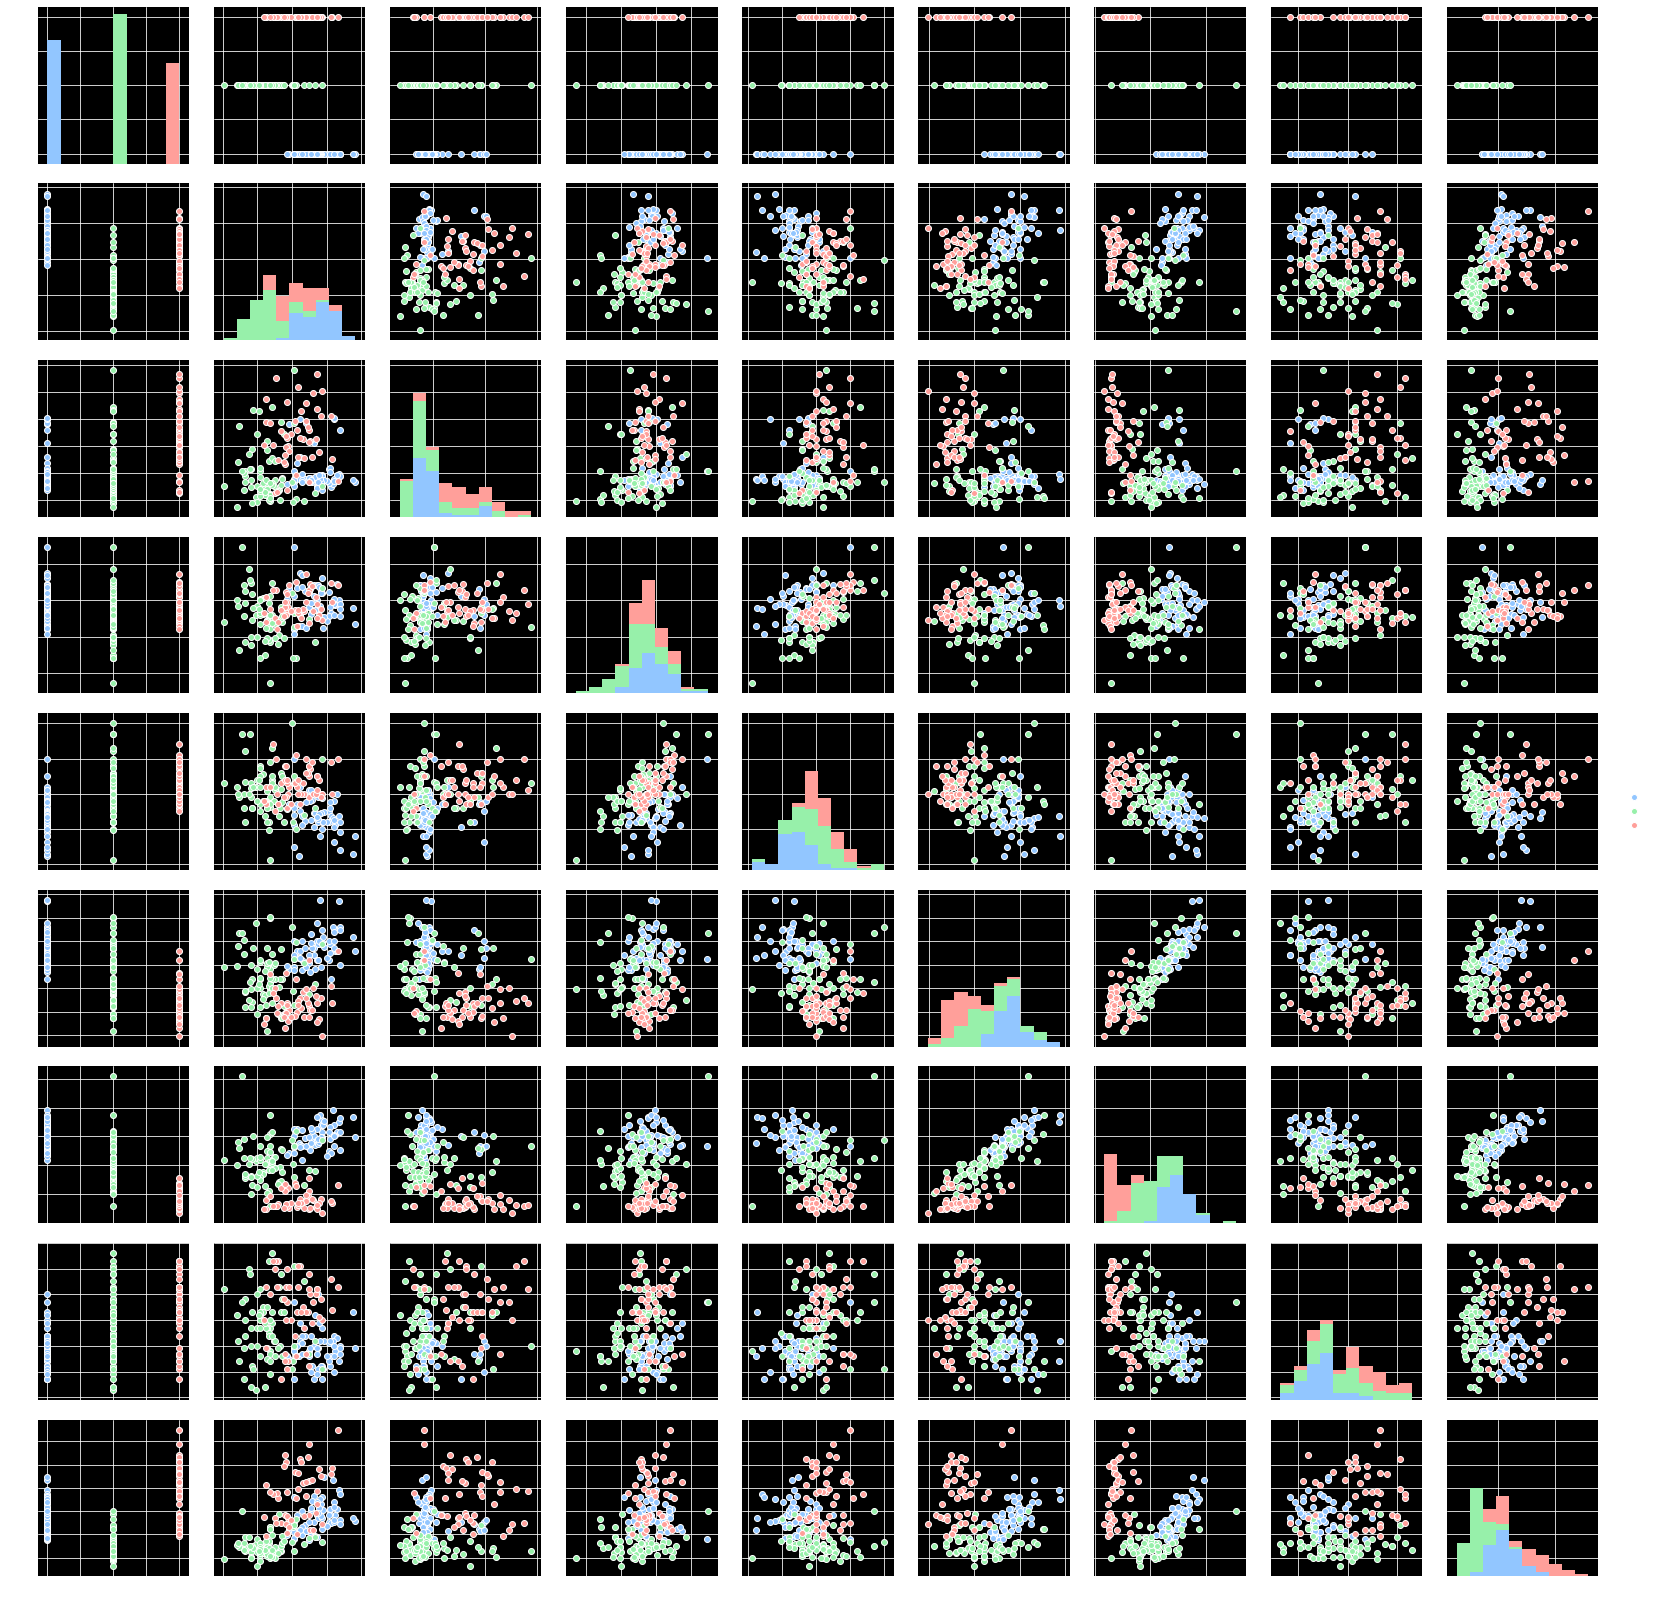

In [6]:
sns.pairplot(df_wine_drop, hue='Class label', palette='pastel')

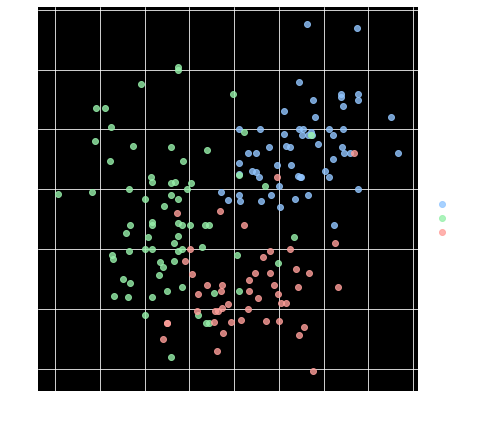

In [7]:

sns.lmplot(x='Alcohol', y='Total phenols', hue='Class label', data=df_wine,fit_reg=False, palette='pastel', aspect=1, size=6)

In [8]:
df_corr = df_wine_drop.corr()

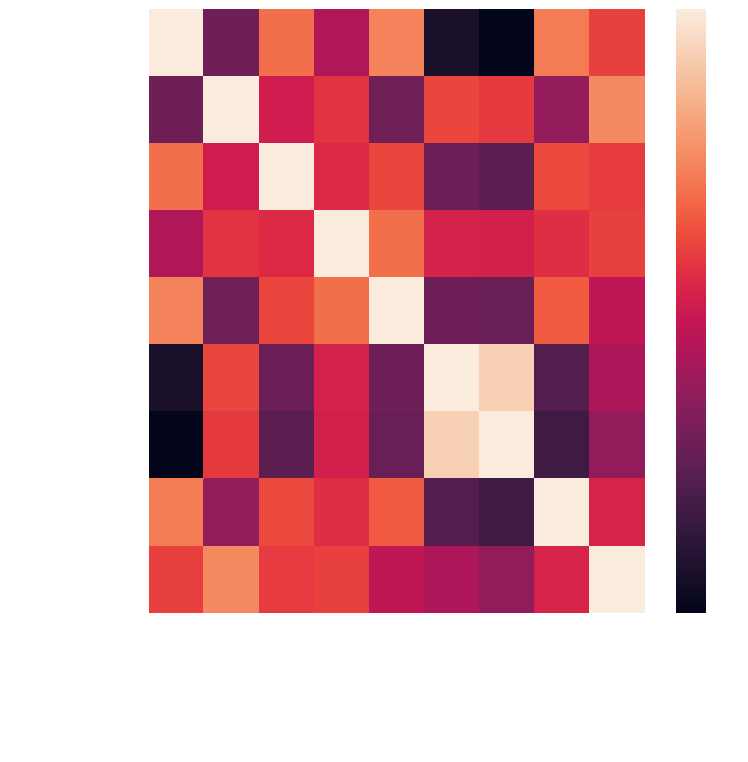

In [9]:
fig = plt.figure(figsize=(8,8),dpi=100)
sns.heatmap(df_corr)

In [10]:
df_corr

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ashs,Total phenols,Flavanoids,Nonflavanoid phenols,Color itensity
Class label,1.000000,-0.328222,0.437776,-0.049643,0.517859,-0.719163,-0.847498,0.489109,0.265668
Alcohol,-0.328222,1.000000,0.094397,0.211545,-0.310235,0.289101,0.236815,-0.155929,0.546364
Malic acid,0.437776,0.094397,1.000000,0.164045,0.288500,-0.335167,-0.411007,0.292977,0.248985
Ash,-0.049643,0.211545,0.164045,1.000000,0.443367,0.128980,0.115077,0.186230,0.258887
Alcalinity of ashs,0.517859,-0.310235,0.288500,0.443367,1.000000,-0.321113,-0.351370,0.361922,0.018732
Total phenols,-0.719163,0.289101,-0.335167,0.128980,-0.321113,1.000000,0.864564,-0.449935,-0.055136
Flavanoids,-0.847498,0.236815,-0.411007,0.115077,-0.351370,0.864564,1.000000,-0.537900,-0.172379
Nonflavanoid phenols,0.489109,-0.155929,0.292977,0.186230,0.361922,-0.449935,-0.537900,1.000000,0.139057
Color itensity,0.265668,0.546364,0.248985,0.258887,0.018732,-0.055136,-0.172379,0.139057,1.000000


### トレーニングセットを分割

In [11]:
df_wine.head()

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ashs,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthcyanins,Color itensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [12]:
round(df_wine.describe(),1)

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ashs,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthcyanins,Color itensity,Hue,OD280/OD315 of diluted wines,Proline
count,178.0,178.0,178.0,178.0,178.0,178.0,178.0,178.0,178.0,178.0,178.0,178.0,178.0,178.0
mean,1.9,13.0,2.3,2.4,19.5,99.7,2.3,2.0,0.4,1.6,5.1,1.0,2.6,746.9
std,0.8,0.8,1.1,0.3,3.3,14.3,0.6,1.0,0.1,0.6,2.3,0.2,0.7,314.9
min,1.0,11.0,0.7,1.4,10.6,70.0,1.0,0.3,0.1,0.4,1.3,0.5,1.3,278.0
25%,1.0,12.4,1.6,2.2,17.2,88.0,1.7,1.2,0.3,1.2,3.2,0.8,1.9,500.5
50%,2.0,13.0,1.9,2.4,19.5,98.0,2.4,2.1,0.3,1.6,4.7,1.0,2.8,673.5
75%,3.0,13.7,3.1,2.6,21.5,107.0,2.8,2.9,0.4,2.0,6.2,1.1,3.2,985.0
max,3.0,14.8,5.8,3.2,30.0,162.0,3.9,5.1,0.7,3.6,13.0,1.7,4.0,1680.0


In [13]:
X = df_wine.loc[: , df_wine.columns != 'Class label']
y = df_wine.loc[:,'Class label']

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

### 特徴量の標準化

In [15]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
X_train_std = std.fit_transform(X_train)
X_test_std = std.fit_transform(X_test)

### 正則化の例 >> L1正則化

In [16]:
from sklearn.linear_model import  LogisticRegression
lr = LogisticRegression(penalty='l1', C=1.0)
lr.fit(X_train_std, y_train)
print('Training accuracy: ', lr.score(X_test_std, y_test))

Training accuracy:  1.0


In [17]:
lr.intercept_

array([-1.26361345, -1.21625065, -2.3710072 ])

In [18]:
lr.coef_

array([[ 1.24601747,  0.18055615,  0.74508668, -1.16273065,  0.        ,
         0.        ,  1.16453428,  0.        ,  0.        ,  0.        ,
         0.        ,  0.55245715,  2.50953998],
       [-1.53684184, -0.38735286, -0.99464284,  0.36435868, -0.05973781,
         0.        ,  0.66790204,  0.        ,  0.        , -1.93434987,
         1.23344434,  0.        , -2.2323944 ],
       [ 0.13533919,  0.16980804,  0.35766005,  0.        ,  0.        ,
         0.        , -2.43382   ,  0.        ,  0.        ,  1.56216455,
        -0.81719447, -0.49731454,  0.        ]])

In [19]:
weights, params, predict = [], [], []
for c in np.arange(-4,6):
    c = 10.**c
    lr = LogisticRegression(penalty='l1', C=c, random_state=0)
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(c)
    predict.append(lr.score(X_test_std, y_test))

weights = np.array(weights)

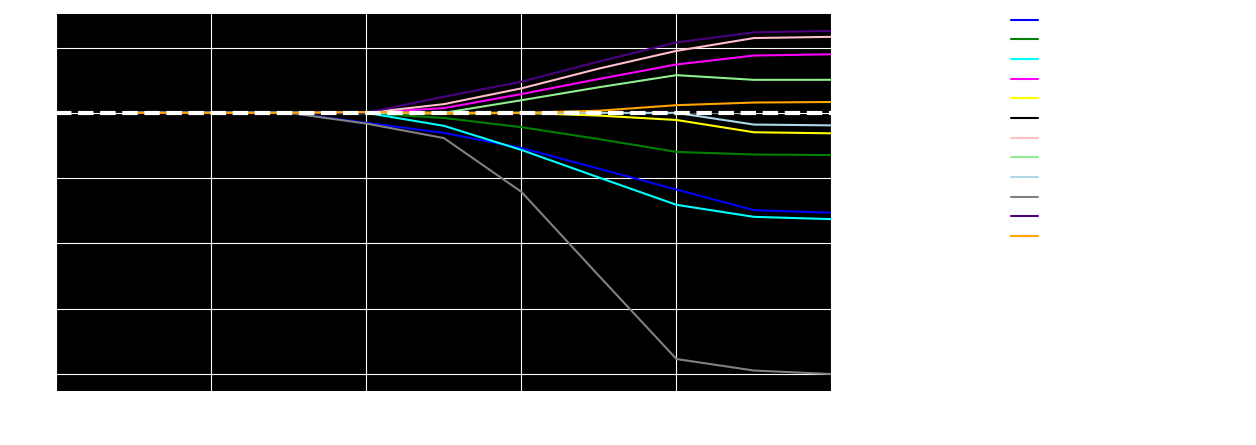

In [20]:
fig = plt.figure(figsize=(10,5),dpi=100)
ax = plt.subplot(111)
colors = ['blue', 'green', 'cyan', 'magenta', 'yellow', 'black', 'pink', 'lightgreen', 'lightblue', 'gray', 'indigo', 'orange']

for column, color in zip(range(weights.shape[1]), colors):
    plt.plot(params, weights[:, column], label = df_wine.columns[column+1], color=color)

plt.axhline(0, color='white', linestyle='--', linewidth=3)
plt.xlim([10**(-5), 10**5])
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.xscale('log')
plt.legend('loc=upper left')
ax.legend(loc='upper center', bbox_to_anchor=(1.38, 1.03), ncol=1, fancybox=True)

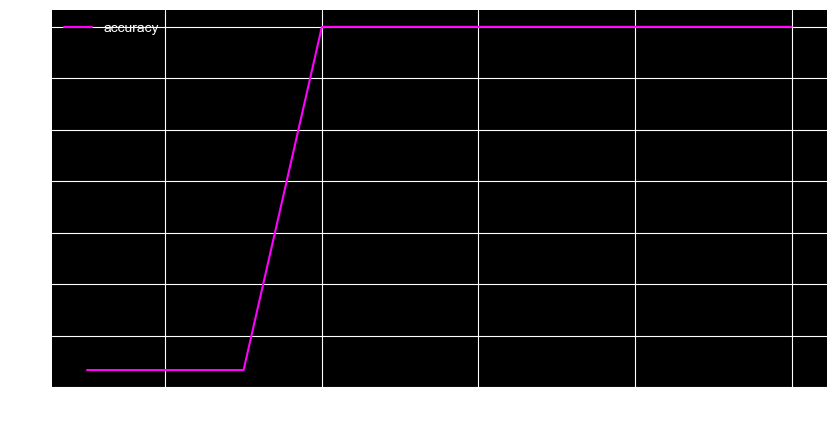

In [21]:
fig = plt.figure(figsize=(10,5),dpi=100)
ax = plt.axes()
ax.plot(params, predict, label = 'accuracy', color="magenta")
ax.set_ylabel('accuracy')
ax.set_xlabel('C')
ax.legend(loc='upper left')
ax.set_xscale('log')

### 特徴点抽出法 >> 逐次特徴選択アルゴリズム

In [22]:
%run sbs.py

/Users/yugi/.pyenv/versions/anaconda-4.0.0/envs/py36/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


<Figure size 432x288 with 0 Axes>

In [23]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
sbs = SBS(knn, k_features=1)
sbs.fit(X_train_std, y_train)

Text(0.5,0,'Number of features')

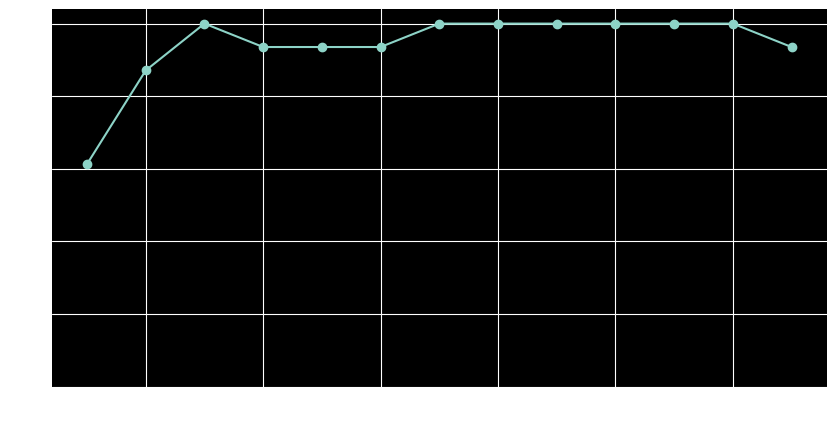

In [24]:
fig = plt.figure(figsize=(10,5),dpi=100)
k_feat = [len(k) for k in sbs.subsets_]
plt.plot(k_feat, sbs.scores_, marker = 'o')
plt.ylim([0.5, 1.02])
plt.ylabel('Accuracy')
plt.xlabel('Number of features')

In [28]:
k4 = list(sbs.subsets_[9])
print(df_wine.columns[1:][k4])

Index(['Alcohol', 'Malic acid', 'Ash', 'OD280/OD315 of diluted wines'], dtype='object')


In [29]:
knn.fit(X_train_std, y_train)
print('Training accuracy: ', round(knn.score(X_train_std, y_train),2))
print('Test accuracy: ', round(knn.score(X_test_std, y_test),2))

Training accuracy:  0.97
Test accuracy:  0.98


In [30]:
knn.fit(X_train_std[:,:3], y_train)
print('Training accuracy: ', round(knn.score(X_train_std[:,:3], y_train),2))
print('Test accuracy: ', round(knn.score(X_test_std[:,:3], y_test),2))

Training accuracy:  0.79
Test accuracy:  0.8


#### ランダムフォレストで算出される不純度の平均度合いから、特徴量の重要度を算出する

In [31]:
from sklearn.ensemble import RandomForestClassifier

In [35]:
feature_label = df_wine.columns[1:]
forest = RandomForestClassifier(n_estimators=500, random_state=1)
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

In [66]:
importance =  pd.Series(forest.feature_importances_,index=feature_label)

In [73]:
im_sorted = importance.sort_values(ascending=False)

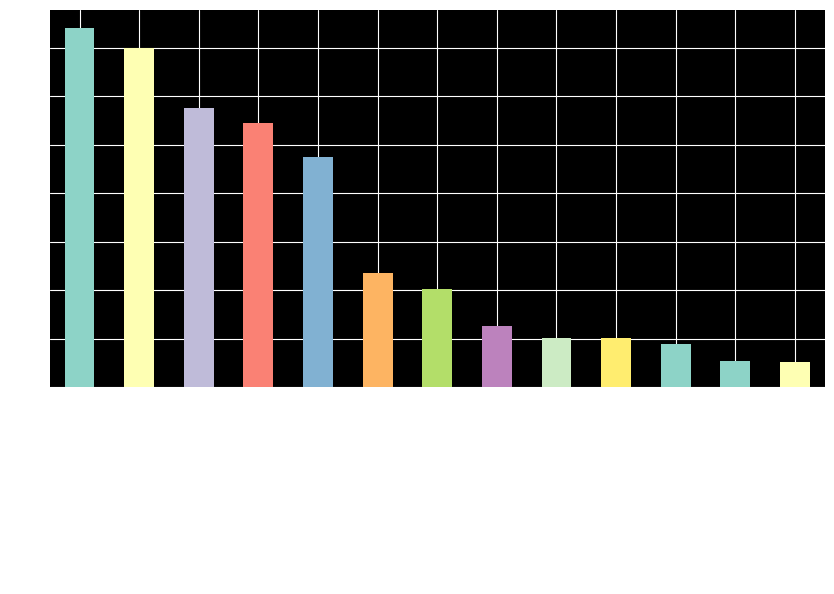

In [75]:
fig = plt.figure(figsize=(10,5),dpi=100)
im_sorted.plot.bar(x=im_sorted.index)